In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.firefox.firefox_binary import FirefoxBinary
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
import time

In [2]:
# Load recipes if already collected
#recipes = pd.read_csv('recipes.csv')

# Create an empty dataframe to store recipes
recipes = pd.DataFrame()


In [3]:
url = 'https://www.dietdoctor.com/low-carb/recipes/popular/all'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
divs = soup.findAll(class_='inner')
len(divs)

770

In [4]:
divs[613]

<div class="inner"><a href="https://www.dietdoctor.com/recipes/low-carb-cabbage-soup-with-chicken-dumplings" title="Keto cabbage soup with chicken dumplings"><picture><source media="(min-aspect-ratio:1/1)" sizes="(min-width:1500px) 470px, (min-width: 1200px) 29.8vw, (min-width: 900px) 27.5vw, (min-width: 600px) 42vw, 45vw" srcset="https://i.dietdoctor.com/wp-content/uploads/2018/01/DD-566-chickenquenellesoup-2.jpg?auto=compress%2Cformat&amp;w=150&amp;h=85&amp;fit=crop 150w,https://i.dietdoctor.com/wp-content/uploads/2018/01/DD-566-chickenquenellesoup-2.jpg?auto=compress%2Cformat&amp;w=200&amp;h=113&amp;fit=crop 200w,https://i.dietdoctor.com/wp-content/uploads/2018/01/DD-566-chickenquenellesoup-2.jpg?auto=compress%2Cformat&amp;w=267&amp;h=151&amp;fit=crop 267w,https://i.dietdoctor.com/wp-content/uploads/2018/01/DD-566-chickenquenellesoup-2.jpg?auto=compress%2Cformat&amp;w=400&amp;h=225&amp;fit=crop 400w,https://i.dietdoctor.com/wp-content/uploads/2018/01/DD-566-chickenquenellesoup-2.jpg

In [6]:
divs = soup.findAll(class_='inner')

rLinks =[]
for div in divs:
    a = (div.find('a', href=True))
    response = requests.get(a['href'])
    soup = BeautifulSoup(response.text, 'html.parser')

    # Keto Recipies obtained from dietdoctor.com
    # Locating, storing, and printing the recipe title
    title = soup.find('h1').text
    #if title in recipes['Title'].values:
        #print('Don\'t do it again')
    #else:
        # Locating the text of the steps    
    steps = soup.findAll(class_='recipe-steps-item')
    recipe = ''
    # Printing out all of the steps in the recipe
    for step in range(0, len(steps)):
        recipe = recipe + ' ' + steps[step].text
    recipe = recipe.strip()
        
    ingredientList = ''
    for span in soup.find_all(class_='ingredient-value-us'): 
        span.decompose()
    for span in soup.find_all(class_='ingredient-value-metric'): 
        span.decompose()
    for span in soup.find_all(class_='ingredient-name-singular'): 
        span.decompose()
    ingredients = soup.findAll(class_='ckdc-ingredient')
    for item in range(0, len(ingredients)):
        items = ingredients[item].text
        items = items.strip()
        ingredientList = ingredientList +' '+ items
    ingredientList = ingredientList.strip()
    ingredientList
        
    tempDF = pd.DataFrame({'Diet':'Keto', 'Title':title, 'Recipe':recipe, 'Ingredients': ingredientList}, index=[0])
    recipes = recipes.append(tempDF, ignore_index=True)
recipes.tail(3)


,Diet,Ingredients,Recipe,Title
700,Keto,eggs olive oil onion powder salt pepper fresh ...,Preheat the oven to 400°F (200°C). Whisk toget...,Parmesan-roasted green beans
701,Keto,"turkey celery root, roughly chopped carrots, r...",Crumble or tear the bread into pieces in a lar...,Holiday turkey with low-carb stuffing and gravy
702,Keto,eggs cream cheese salt ground psyllium husk po...,"If you don’t already have some on hand, begin ...",Low-carb Philly cheesesteak sandwich


In [7]:
# Keto Recipies obtained from dietdoctor.com
# Locating, storing, and printing the recipe title
title = soup.find('h1').text
if title in recipes['Title'].values:
    print('Don\'t do it again')
else:
    # Locating the text of the steps    
    steps = soup.findAll(class_='recipe-steps-item')
    recipe = ''
    # Printing out all of the steps in the recipe
    for step in range(0, len(steps)):
        recipe = recipe + ' ' + steps[step].text
    recipe = recipe.strip()
    tempDF = pd.DataFrame({'Diet':'Keto', 'Title':title, 'Recipe':recipe}, index=[0])
    recipes = recipes.append(tempDF, ignore_index=True)
recipes.tail(3)

Don't do it again


,Diet,Ingredients,Recipe,Title
700,Keto,eggs olive oil onion powder salt pepper fresh ...,Preheat the oven to 400°F (200°C). Whisk toget...,Parmesan-roasted green beans
701,Keto,"turkey celery root, roughly chopped carrots, r...",Crumble or tear the bread into pieces in a lar...,Holiday turkey with low-carb stuffing and gravy
702,Keto,eggs cream cheese salt ground psyllium husk po...,"If you don’t already have some on hand, begin ...",Low-carb Philly cheesesteak sandwich


In [8]:

ingredientList = ''

for span in soup.find_all(class_='ingredient-value-us'): 
    span.decompose()
for span in soup.find_all(class_='ingredient-value-metric'): 
    span.decompose()
for span in soup.find_all(class_='ingredient-name-singular'): 
    span.decompose()
ingredients = soup.findAll(class_='ckdc-ingredient')
for item in range(0, len(ingredients)):
    items = ingredients[item].text
    items = items.strip()
    ingredientList = ingredientList +' '+ items
ingredientList = ingredientList.strip()
ingredientList

'eggs cream cheese salt ground psyllium husk powder baking powder olive oil deli roast beef yellow onions green bell peppers garlic cloves, finely chopped salt ground black pepper provolone cheese, in slices or shredded tomato sauce'

In [9]:
recipes.tail(10)

,Diet,Ingredients,Recipe,Title
693,Keto,"butter at room temperature garlic cloves, fine...",Preheat the oven to 400°F (200°C). Heat the mo...,Keto garlic and rosemary foccacia
694,Keto,coconut flour baking soda salt ground psyllium...,Heat a large cast iron skillet or griddle medi...,Soft keto tortillas
695,Keto,almonds or hazelnuts pumpkin seeds flaxseed se...,Preheat the oven to 300°F (150°C). Mix the dry...,Paleo bread
696,Keto,"unsweetened almond milk, heated decaf espresso...",Place all the ingredients in a blender and pur...,Pumpkin latte
697,Keto,sesame seeds sunflower seeds shredded cheese g...,Mix together all ingredients (grate the cheese...,Low-carb sesame crispbread
698,Keto,"yellow onions, finely chopped butter, for fryi...",Fry chopped onions in a generous amount of but...,Browned butter cauliflower mash
699,Keto,heavy whipping cream vanilla extract star anis...,"Add butter, vanilla, optional star anise to a ...",Low-carb cinnamon apples with vanilla sauce
700,Keto,eggs olive oil onion powder salt pepper fresh ...,Preheat the oven to 400°F (200°C). Whisk toget...,Parmesan-roasted green beans
701,Keto,"turkey celery root, roughly chopped carrots, r...",Crumble or tear the bread into pieces in a lar...,Holiday turkey with low-carb stuffing and gravy
702,Keto,eggs cream cheese salt ground psyllium husk po...,"If you don’t already have some on hand, begin ...",Low-carb Philly cheesesteak sandwich


In [10]:
ketoRecipies = recipes.loc[0:610,]

In [11]:
# Vegan Recipies obtained via minimalistbaker.com

linkList = []
for page in range(1,56):
    url = 'https://minimalistbaker.com/recipes/page/' + str(page)
    print(url)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    #rLink = soup.find_all('a', {'class':'entry-image-link'},href=True)
    rLink = soup.find_all('a')
    for link in rLink:
        print(link)
        print('\n')
    #print(rLink) 
    

https://minimalistbaker.com/recipes/page/1
<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%20300%20103'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%20300%20103'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%20300%20103'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%20300%20103'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%20300%20103'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%201%201'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</span

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%201%201'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</span

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%201%201'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</span

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%201%201'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</span

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%201%201'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</span

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%201%201'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</span

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%201%201'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</span

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%201%201'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</span

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%20300%20103'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%201%201'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</span

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%20300%20103'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%201%201'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</span

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%201%201'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</span

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%201%201'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</span

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%20300%20103'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%201%201'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</span

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%201%201'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</span

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%201%201'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</span

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%201%201'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</span

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%201%201'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</span

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%20300%20103'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%201%201'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</span

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%201%201'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</span

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%201%201'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</span

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%201%201'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</span

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%201%201'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</span

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%201%201'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</span

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%20300%20103'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%20300%20103'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%201%201'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</span

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%201%201'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</span

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%20300%20103'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%20300%20103'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%201%201'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</span

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%201%201'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</span

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%201%201'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</span

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%20300%20103'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%20300%20103'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%20300%20103'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%20300%20103'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%20300%20103'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%20300%20103'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%201%201'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</span

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%20300%20103'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%20300%20103'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%20300%20103'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%20300%20103'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%20300%20103'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%20300%20103'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</

<a href="https://minimalistbaker.com/" title="Minimalist Baker"><img alt="Minimalist Baker" data-lazy-src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" height="103px" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%20300%20103'%3E%3C/svg%3E" title="Minimalist Baker" width="300px"/><noscript><img alt="Minimalist Baker" height="103px" src="https://minimalistbaker.com/wp-content/themes/baker/images/logo.png" title="Minimalist Baker" width="300px"/></noscript></a>


<a href="https://minimalistbaker.com/about/" itemprop="url"><span itemprop="name">about</span></a>


<a href="https://minimalistbaker.com/recipe-index/" itemprop="url"><span itemprop="name">recipes</span></a>


<a href="https://minimalistbaker.com/product-category/cookbooks/" itemprop="url"><span itemprop="name">Cookbooks</span></a>


<a href="https://minimalistbaker.com/everyday-cooking/" itemprop="url" target="_blank"><span itemprop="name">Everyday Cooking (print)</

In [20]:
options = webdriver.FirefoxOptions()
options.add_argument('-headless')
driver = webdriver.Firefox(firefox_options=options)
for page in range(1,56):
    url = 'https://minimalistbaker.com/recipes/page/' + str(page)
    print(url)
    
    

        # create a new Firefox session
    driver.implicitly_wait(10)
    driver.get(url)
    delay = 5 # seconds

    myElem = WebDriverWait(driver, delay).until(EC.presence_of_element_located((By.CLASS_NAME, 'entry-image-link')))
    print("Page is ready!")
    soup=BeautifulSoup(driver.page_source, 'lxml')
    rLink = soup.find_all('a', {'class':'entry-image-link'},href=True)

    for link in rLink:
        print(str(link['href']))
        print('\n')
        linkList.append(link['href'])
        #print(rLink) 


https://minimalistbaker.com/recipes/page/1
Page is ready!
https://minimalistbaker.com/cashew-crusted-cauliflower-steak/


https://minimalistbaker.com/balsamic-marinated-portobello-pizzas/


https://minimalistbaker.com/crispy-shallot-spring-rolls-with-seared-tofu/


https://minimalistbaker.com/garlic-dill-sunflower-dip/


https://minimalistbaker.com/no-bake-carrot-cake-bites/


https://minimalistbaker.com/easy-tofu-pad-thai/


https://minimalistbaker.com/flavored-protein-powder-review/


https://minimalistbaker.com/5-ingredient-vegetarian-fish-sauce/


https://minimalistbaker.com/lemony-arugula-salad-with-crispy-shallot/


https://minimalistbaker.com/golden-milk-paste/


https://minimalistbaker.com/vegan-chocolate-protein-powder-review/


https://minimalistbaker.com/5-minute-vegan-cashew-queso/


https://minimalistbaker.com/20-minute-tofu-stir-fry/


https://minimalistbaker.com/fluffy-vegan-scrambled-eggs/


https://minimalistbaker.com/how-to-make-dairy-free-buttercream-frosting/


http

TimeoutException: Message: Timeout loading page after 300000ms


In [21]:
vIngs = []
vDirs = []
vTitle = []
options = webdriver.FirefoxOptions()
options.add_argument('-headless')
driver = webdriver.Firefox(firefox_options=options)
for page in linkList[len(vIngs)+1:]:
    
    #create a new Firefox session
    driver.implicitly_wait(5)
    driver.get(page)
    try:
        myElem = WebDriverWait(driver, delay).until(EC.presence_of_element_located((By.CLASS_NAME, 'wprm-recipe-ingredient-name')))
        print("Page is ready!")
        soup=BeautifulSoup(driver.page_source, 'lxml')
        ings = soup.find_all(class_='wprm-recipe-ingredient-name')
        dirs = soup.find_all(class_='wprm-recipe-instruction-text')
        title = soup.find(class_='entry-title').text
        ingredientList = ''
        steps = ''
        for x in ings:
            ingredientList = ingredientList + ' ' + x.text
        for x in dirs:
            steps = steps + ' ' + x.text
        steps = steps.strip()
        ingredientList = ingredientList.strip()
        print(title)
        print('\n')
        vIngs.append(ingredientList)
        vDirs.append(steps)
        vTitle.append(title)
    except:
        print('Not a recipe')
    


Page is ready!
Balsamic-Marinated Portobello Pizzas


Page is ready!
Crispy Shallot Spring Rolls with Seared Tofu


Page is ready!
Garlic Dill Sunflower Dip


Page is ready!
No-Bake Carrot Cake Bites


Page is ready!
Easy Tofu Pad Thai


Not a recipe
Page is ready!
5-Ingredient Vegetarian Fish Sauce


Page is ready!
Lemony Arugula Salad with Crispy Shallot


Page is ready!
Golden Milk Paste


Not a recipe
Page is ready!
5-Minute Vegan Cashew Queso


Page is ready!
20-Minute Tofu Stir-Fry


Page is ready!
Fluffy Vegan Scrambled Eggs


Page is ready!
How to Make Dairy-Free Buttercream Frosting


Page is ready!
Baked Crispy Peanut Tofu


Page is ready!
Lazy 1-Pot Vegan Tom Yum Soup


Page is ready!
1-Bowl Chocolate Chip Banana Baked Oatmeal


Page is ready!
Easy Vegan Lasagna


Page is ready!
30-Minute Potato Cauliflower Red Lentil Curry


Page is ready!
1-Bowl Vegan Gluten-Free Banana Bread


Page is ready!
How to Make Pour-Over Coffee


Page is ready!
Vegan Palak Paneer with Curried Tof

In [22]:
url = 'https://minimalistbaker.com/peanut-lemongrass-tempeh-satay/'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
ings = soup.find_all(class_='wprm-recipe-ingredient-name')
dirs = soup.find_all(class_='wprm-recipe-instruction-text')
for x in ings:
    print(x.text)
for x in dirs:
    print(x.text)

tempeh (we like Tofurky brand // ensure gluten-free friendly if needed // ensure grain-free if needed // opt for soy-free if needed)
chili garlic sauce 
sesame oil 
salted creamy peanut butter 
coconut aminos 
lime juice
maple syrup
fresh turmeric*
garlic
sea salt
lemongrass
Fresh cilantro
Peanut Sauce
Butter lettuce cups or salads
Noodle Bowls
Sriracha or chili garlic sauce
To reduce bitterness in the tempeh, add to rimmed skillet or saucepan filled with 1 inch of water and bring to a low boil over medium heat. Steam tempeh (uncovered) for a total of 10-12 minutes, flipping once at the halfway point.
Rinse, pat dry, and cut into bite-size pieces. I prefer slicing the tempeh in half lengthwise then cutting into triangles or rectangles. Keep in mind they need to be thick and large enough to add to skewers (if using). Set aside.
Make marinade by adding all ingredients (chili garlic sauce, sesame oil, peanut butter, coconut aminos, lime juice, maple syrup, turmeric (optional), garlic, sal

In [23]:
print(len(linkList))
print(len(vIngs))
print(vTitle[len(vIngs)-1])
print(linkList[len(vIngs):])



48
45
How to Make Balsamic Vinaigrette
['https://minimalistbaker.com/4-ingredient-vegan-easy-brownies/', 'https://minimalistbaker.com/how-to-make-lemon-vinaigrette/', 'https://minimalistbaker.com/how-to-make-balsamic-vinaigrette/']


In [24]:
print(len(vTitle))
print(len(vDirs))
print(len(vIngs))

45
45
45


In [25]:

tempDF = pd.DataFrame({'Diet':'Vegan', 
                       'Title':vTitle, 
                       'Recipe':vDirs, 
                       'Ingredients':vIngs})
tempDF.drop_duplicates(inplace=True)
tempDF.reset_index(inplace=True, drop='True')
tempDF

,Diet,Ingredients,Recipe,Title
0,Vegan,portobello mushrooms balsamic vinegar avocado...,Preheat oven to 400 degrees F (204 C) and line...,Balsamic-Marinated Portobello Pizzas
1,Vegan,"extra firm tofu, pressed* coconut aminos chili...",Preheat oven to 400 degrees F (204 C) so you'r...,Crispy Shallot Spring Rolls with Seared Tofu
2,Vegan,"raw sunflower seeds, soaked* garlic sea salt l...",Soak sunflower seeds in room temperature water...,Garlic Dill Sunflower Dip
3,Vegan,peeled and finely shredded carrot packed pitte...,Using the grater attachment on your food proce...,No-Bake Carrot Cake Bites
4,Vegan,tamarind sauce / concentrate* coconut aminos ...,"To a small saucepan, add tamarind, coconut ami...",Easy Tofu Pad Thai
5,Vegan,water dulse dried shiitake mushrooms sea salt ...,"To a small saucepan, add water, dulse, dried s...",5-Ingredient Vegetarian Fish Sauce
6,Vegan,garlic Olive oil shallots brown rice flour e...,"To roast the garlic, peel apart garlic cloves ...",Lemony Arugula Salad with Crispy Shallot
7,Vegan,ground turmeric ground ginger powder ground ci...,"To make mix, add all spices (add-ins optional)...",Golden Milk Paste
8,Vegan,"hot water raw cashews garlic, chopped nutritio...",Add all ingredients to a blender (starting wit...,5-Minute Vegan Cashew Queso
9,Vegan,"cauliflower rice extra firm tofu, pressed and...","If you haven’t done so already, prepare caulif...",20-Minute Tofu Stir-Fry


In [26]:
pLinkList = []

In [29]:
options = webdriver.FirefoxOptions()
#options.add_argument('-headless')
driver = webdriver.Firefox(firefox_options=options)

url = 'https://ultimatepaleoguide.com/recipes/'
print(url)
# create a new Firefox session
driver.implicitly_wait(10)
driver.get(url)
delay = 5 # seconds
myElem = WebDriverWait(driver, delay).until(EC.presence_of_element_located((By.CLASS_NAME, 'wpupg-grid')))
print("Page is ready!")
SCROLL_PAUSE_TIME = 2.5
element = driver.find_element_by_id("Tips_On_Making_Your_Own_Paleo_Recipes")
driver.execute_script("arguments[0].scrollIntoView();", element)
last_height = driver.execute_script("return document.body.scrollHeight")
while True:
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, "+str(element.location['y']-350)+");")
    # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height
# Get scroll height



soup=BeautifulSoup(driver.page_source, 'lxml')
rLink = soup.find_all(class_='wpupg-grid')

for link in rLink[0].find_all('a', href=True):
        print(str(link['href']))
        print('\n')
        pLinkList.append(str(link['href']))


https://ultimatepaleoguide.com/recipes/
Page is ready!


NoSuchElementException: Message: Unable to locate element: [id="Tips_On_Making_Your_Own_Paleo_Recipes"]


In [177]:
len(pLinkList)

450

In [190]:
pTitle = []
pSteps = []
pIngs = []

for link in pLinkList:
    print(link)
    response = requests.get(link)
    soup = BeautifulSoup(response.text, 'html.parser')
    rec = soup.findAll(class_='wprm-recipe-simple')
    # Paleo Recipies obtained from ultimatepaleoguide.com
    # Locating, storing, and printing the recipe title
    try:
        title = soup.find(class_='wprm-recipe-name').text
        print(title)
        pTitle.append(title)
        
        steps = soup.findAll(class_='wprm-recipe-instruction-text')
        recipe = ''
        # Printing out all of the steps in the recipe
        for step in range(0, len(steps)):
            recipe = recipe + ' ' + steps[step].text
        recipe = recipe.strip()
        print(recipe)
        print('\n')
        pSteps.append(recipe)
        ingredients = soup.find_all(class_='wprm-recipe-ingredient-name')
        
        ingredientList = ''
        for item in range(0, len(ingredients)):
            items = ingredients[item].text
            items = items.strip()
            ingredientList = ingredientList +' '+ items
        ingredientList = ingredientList.strip()
        ingredientList
        print(ingredientList)
        print('\n')
        pIngs.append(ingredientList)
        
        
    except:
        print('Not a real recipe')
    
    
        
paleoDF = pd.DataFrame({'Diet':'Paleo', 'Title':pTitle, 'Recipe':pSteps, 'Ingredients': pIngs})
#recipes = recipes.append(tempDF, ignore_index=True)
#recipes.tail(3)



    
   

https://ultimatepaleoguide.com/oven-apple-chips/
Oven Apple Chips
Preheat oven to 200 degrees F. Core the apples and thinly slice using a sharp knife or mandolin. The thinner your slices, the crispier the apple chips will be. Lay on baking sheets in a single layer, sprinkle on cinnamon, and bake for 1 hour. Flip, and continue baking until crisp. Let cool completely, and store in an airtight container.


apples ground cinnamon


https://ultimatepaleoguide.com/italian-braised-greens/
Italian Braised Greens
Cook the bacon in a heavy straight-sided skillet. Remove with a slotted spoon and set aside. Add the garlic and the greens to the pan and sauté for a minute or two. Add the broth, and bring to a low simmer.  Braise for 10 minutes, until greens are tender and liquid is reduced. Stir in the lemon juice and turn off heat. Stir in the reserved bacon and serve.


bacon garlic hearty winter greens such as chard chicken broth Juice of 1 lemon Sea salt and fresh ground pepper


https://ultimat

Cucumber Lemon Water
Put all of the ingredients in a pitcher and refrigerate for 1 hour. Drink within 3 days.


filtered water cucumber lemon


https://ultimatepaleoguide.com/buffalo-meatballs/
Buffalo Meatballs
Preheat oven to 425 degrees F. Combine the beef, pork, onion, celery, chives, hot sauce, egg, salt, and almond flour in a bowl. Form into 2-3 inch meatballs. Line a baking sheet with foil or parchment and lay the meatballs on it. Brush with the oil and bake for 15-20 minutes, until cooked through. Serve immediately.


grass-fed ground beef ground pork onion celery stalks minced chives hot sauce egg almond flour sea salt olive oil Additional hot sauce


https://ultimatepaleoguide.com/open-faced-kale-spinach-omelet/
Open Faced Kale and Spinach Omelet
Heat the oil in a small skillet over medium low heat. Add the onion, garlic, kale, and spinach and cook until soft.  Add the eggs and cook for a minute until the edges are set. Lift the edges carefully and let the liquid flow underne

Turmeric Apple Cider
Put everything in a large stockpot and cover with water. Bring to a boil. Boil for 45 minutes and turn down heat to a low simmer.  Simmer for an hour and let cool. Mash apples with a potato masher. Line a large strainer with cheesecloth and strain the mixture until no liquid is left in the apples.  Store in an airtight container; heat in microwave or on stove before serving.


Apples Raw honey cinnamon sticks Allspice ground turmeric


https://ultimatepaleoguide.com/christmas-morning-ginger-pancakes/
Christmas Morning Ginger Pancakes
Combine all of the ingredients in a bowl and mix well.  Heat a skillet or griddle over medium heat and add coconut oil.  Spoon the batter onto the surface and cook until bubbly.  Flip, cook until browned. Serve warm.


Eggs ripened bananas Coconut flour powdered ginger Cinnamon Ground cloves Coconut oil


https://ultimatepaleoguide.com/ginger-hot-chocolate/
Ginger Hot Chocolate
Put the cocoa, honey, ginger, cinnamon, and water in a med

Strawberry Grapefruit Ice Cream
Put the bananas, coconut milk, and grapefruit juice and zest in a blender. Blend until smooth and add the strawberries and honey. Continue blending until smooth.   Transfer the mixture to an airtight, freezer-safe container. Freeze overnight, or until firm. Scoop and serve


frozen bananas can coconut milk Juice and zest of 1 grapefruit frozen strawberries tablespoons raw honey


https://ultimatepaleoguide.com/sliced-beet-baby-arugula-salad/
Sliced Beet and Baby Arugula Salad
Toss the greens and beets in a bowl.  In another bowl, whisk the oil and orange juice and toss with the salad.  Garnish with the cheese if using.


baby arugula or other tender spring green red beet golden beet olive oil Juice of 1 orange crumbled goat cheese


https://ultimatepaleoguide.com/mango-orange-spritzer/
Mango Orange Spritzer
Combine the water, orange juice and mango in a quart sized jar with a lid. Chill until ready to serve.


sparkling water Juice of 1 orange ripened ma

Chilled Strawberry Lavender Soup
Put all of the ingredients in a blender. Blend until smooth and creamy. Transfer to an airtight container and chill overnight for best results.  
 Serve chilled, topped with sliced strawberries if desired.


Coconut milk Fresh strawberries Juice of 1 orange culinary lavender leaves Water Sea salt Fresh ground black pepper


https://ultimatepaleoguide.com/vanilla-chia-parfait/
Vanilla Chia Parfait
Put the coconut milk, chia seeds, honey, vanilla, and salt in a container with lid and stir well. Cover and refrigerate overnight.  
 When ready to serve, either layer the chia mixture with fruit for a parfait, or eat as is, chilled. Sprinkle with coconut flakes if desired.


coconut milk chia seeds honey vanilla extract sea salt Fruit Coconut flakes


https://ultimatepaleoguide.com/chicken-arugula-salad-bacon-dressing/
Chicken Arugula Salad with Bacon Dressing
Cook the bacon in a large skillet over medium heat until crisp. Remove bacon from pan, add to a large

Apple Spice Green Smoothie
Put all ingredients in a blender and blend until smooth and creamy. Serve immediately.


Banana Apple baby spinach Cinnamon cardamom Nutmeg Coconut milk Ice


https://ultimatepaleoguide.com/peppermint-dark-chocolate-truffles/
Peppermint Dark Chocolate Truffles
Heat the coconut milk to a simmer, either in a saucepan or the microwave. Put the chocolate and coconut oil in a large bowl and pour the hot milk in. Stir gently, until chocolate is melted, and mixture is smooth. Add the peppermint extract, and stir until combined.  Cover the mixture and refrigerate until firm, 3-4 hours, or overnight.  When ready to make the truffles, pour some cocoa powder in a small bowl. Remove chocolate mixture from fridge, and scoop into 36 1-inch balls using either a melon baller or cookie scoop. Form into balls and roll in the cocoa powder. Store in an airtight container in the fridge until ready to serve.


coconut milk from a can Dark chocolate Coconut oil Peppermint extract C

Paleo Cabbage Salad with Almond Dressing
Toss the cabbage, carrots, and almonds in a large bowl.  
 
Make the dressing by whisking the remaining ingredients until well combined. For a creamier consistency, blend in a blender until smooth.


Shredded cabbage Carrots Almonds Almond butter Sesame oil Ginger Honey Garlic Lime Sea salt and fresh ground pepper


https://ultimatepaleoguide.com/goji-berry-salad-with-raspberry-dressing/
Goji Berry Salad with Raspberry Dressing
Put the dressing ingredients in a jar and shake until well combined. Toss the salad ingredients in a large bowl and add the dressing just before serving.


olive oil Raspberry vinegar Dijon mustard Honey Garlic clove Mixed baby greens Goji berries Sunflower seeds Goat cheese


https://ultimatepaleoguide.com/paleo-shrimp-and-walnut-stir-fry/
Paleo Shrimp and Walnut Stir-Fry
Heat the oil in a large skillet over medium heat. Add 1 tablespoon of the oil. Add the green onions and cook for a minute. Add the garlic, stir, and ad

Buffalo Mushroom Skewers
With a paper towel, carefully clean the mushrooms, but don’t get them wet. Leave whole, but remove the stems if desired.  Whisk the hot sauce, olive oil, and salt in a bowl. Add the mushrooms and toss to coat.   To cook the mushrooms, thread them on skewers and lay on a baking sheet (or alternatively, you can leave them off the skewers) Bake for 15 minutes in a 375 degree oven, or grill them on a grill over medium high heat. Serve warm.


Button mushrooms Hot sauce olive oil Sea salt


https://ultimatepaleoguide.com/4-eggcellent-recipes/
Not a real recipe
https://ultimatepaleoguide.com/paleo-sweet-potato-casserole/
Paleo Sweet Potato Casserole
Preheat oven to 350 degrees F.   Put the potatoes in a saucepan and over with cold water. Bring to boil, reduce to a simmer, and cook for 10-12 minutes, until tender. Drain.   Transfer potatoes to a large bowl and mash well with a potato masher. Add the coconut milk, coconut oil, orange juice, ginger, cinnamon, and salt. 

Pumpkin or Cinnamon Smoothie: Cinnamon Smoothie with Coconut Cream
Remove the coconut milk from the refrigerator. Without shaking, open the can. Scoop out the coconut cream from the top of the can.  Put the remaining ingredients in a blender, with about 1/2 cup of the coconut milk. Blend until smooth.  the smoothie into two glasses and add a dollop of the coconut cream, reserving the remaining cream and milk for another use.  Garnish with cinnamon and serve immediately.


Coconut milk Almond butter Cinnamon Bananas Dates


https://ultimatepaleoguide.com/4-paleo-friendly-dishes-perfect-for-winter/
Not a real recipe
https://ultimatepaleoguide.com/pumpkin-dish-curried-chicken/
Pumpkin Dish: Curried Chicken with Mashed Pumpkin
Preheat oven to 400 degrees F.   Cut the pumpkin in half and scoop out the seeds.  Lay on a baking sheet, cut side up. Drizzle with 1 teaspoon coconut oil and season with salt and pepper.  Bake for 35-40 minutes, until tender While the pumpkin is roasting, heat the r

Not a real recipe
https://ultimatepaleoguide.com/pork-roll-with-eggs-over-easy/
Pork Roll with Eggs Over Easy
In a medium mixing bowl, mix together the pork, spices, salt, and shallot using your hands to blend well.  Form 6 pork rolls that are evenly sized.  Wrap each pork roll in a slice of bacon.  Heat the coconut oil in a skillet on medium-high heat. Add the pork rolls and sear on each side, making sure the bacon does not come up wrapped. Once seared on each side, turn the heat down to medium-low and allow the pork to cook through, turning occasionally to prevent the bacon from burning.  While the pork roll is cooking, use a nonstick skillet to cook the eggs.  Serve the pork roll with an egg and side of roasted asparagus if desired.  Enjoy.


Ground pork bacon Ground cinnamon Ground nutmeg Ground ginger Salt Shallow Almond meal Coconut oil Eggs


https://ultimatepaleoguide.com/6-healthy-paleo-pumpkin-recipes-youve-gotta-try/
Not a real recipe
https://ultimatepaleoguide.com/sundried-

Sweet Potato Soup with Bacon
Add the sweet potatoes, chicken stock, cinnamon, nutmeg, and ginger to the slow cooker.  Cook on low for 6 hours.  Add the coconut milk and use your immersion blender to blend until creamy.  Serve hot topped with bacon.


Sweet potatoes Chicken stock Ground cinnamon Ground nutmeg Ground ginger Coconut milk bacon


https://ultimatepaleoguide.com/slow-cooker-pulled-pork/
Slow Cooker Pulled Pork
BBQ Sauce: Add the ghee to a pot over medium heat. Stir until melted. Add the remaining ingredients to the pot. Bring the mixture to a simmer. Simmer for 15 minutes, stirring occasionally to prevent burning. Remove from the burner and set aside to cool.  Pulled Pork: Pour half the BBQ sauce in the bottom of the slow cooker. Sprinkle the sliced onion on top of the sauce. Place the pork shoulder on top of the onions. Season with salt. Pour the remaining BBQ sauce over the pork. Secure the lid and cook for 8 hours on low. Once the pork is done cooking, use a fork to shred

Almond Pesto Crusted Cod with Pesto Zucchini Noodles
Preheat oven to 350 degrees F. Add the 2 tbsp of almonds to a good processor and grind. Set aside.  Add the ingredients for the pesto to a food processor. Blend on high until smooth. Set aside.  In a small bowl mix together the 2 tbsp almond meal and 2 tbsp of the pesto.  Pat the piece of cod dry with a paper towel. Place the fish on a baking sheet. Season the fish with salt. Take the pesto and ground almonds and spoon it on top of the fish, pressing it down slightly to form a crust.  Place the fish in the oven and bake for 8-10 minutes.  While the fish is cooking heat the olive oil over medium heat in a skillet. Add the zucchini noodles and ¼ cup pesto (or the rest of the pesto if it is almost gone). Sauté until the noodles are tender, about 3-4 minutes. Season with salt to taste.  Spoon the noodles onto a plate.  When the fish is done remove from the oven. Place the fish over the noodles, garnish with cherry tomatoes and serve.


A

Kale Chips
Clean the kale well, then dry on a paper towel, allowing it to get as dry as possible. Preheat the oven to 350 degrees F. Line a rimmed baking sheet with parchment paper. Cut the middle stem off each kale leaf and discard. Then cut the remaining leaf piece into bite sized pieces, about 4 per leak. Play the kale in a single layer on the prepared baking sheet, not allowing the leaves to touch. Using an oil mist sprayer, spray each kale piece liberally with oil, flip and repeat on both sides. Season with salt. Alternately you can add the kale to a mixing bowl, and pour the oil and salt into the bowl. Use your hands to toss the kale so it’s evenly coated with oil and salt. Lay the kale in a single layer on the prepared baking sheet. Place the kale in the oven for 10-12 minutes, then flip each piece. Cook another 4-5 minutes or until the kale is crispy but not brown. Transfer to a serving vessel and enjoy!


Kale olive oil Sea salt


https://ultimatepaleoguide.com/pumpkin-bacon-s

Paleo Sloppy Joes
Heat the coconut oil over medium high heat in a large skillet. Add the onion, pepper, and celery and sauté for 4-5 minutes, or until the vegetables are soft. Add the garlic, sauté for 2-3 minutes. Add the ground beef and cook until browned and cooked through. Add the tomato sauce and spices. Stir to combine. Scrape any bits off the bottom of the skillet. Cook on medium heat until the sauce thicken a bit, about 10 minutes. Serve hot with a side of steamed vegetables.


Ground beef Bell pepper Onion Celery stalks Garlic clove Cumin Chili powder Tomato sauce Cayenne pepper Red pepper flake Sea salt Fresh cracked black pepper Coconut oil


https://ultimatepaleoguide.com/pesto-stuffed-sardines/
Pesto Stuffed Sardines
Preheat the broiler. Place the top shelf about 6 inches from the broiler in your oven. Combine all the ingredients for the pesto in a food processor. Blend until a paste forms. Set aside. Rinse the sardines and pat dry with a paper towel. Place the sardines on

Paleo Orange Gummies
Add orange juice and 3 c water to a small saucepan on low. Warm the water but do not let it boil. Once water is warm, add in sweetener and stir to dissolve. If desired, add 2 drops yellow food coloring. Add the lemon extract. While water is warming, add gelatin to remaining 1/2 c warm water in a separate dish and stir to make gelatin paste. Remove pot from heat and stir gelatin paste into the rest of the liquid. Once fully combined, pour liquid into a silicone mold or an 8x8 glass baking dish. Refrigerate overnight or until set. Once the gummies are set, remove from mold and use a knife to cut into squares or get little fingers involved and use shaped cookie cutters! Store in fridge.


Water Gelatin powder Lemon extract Honey 100% orange juice Yellow food coloring


https://ultimatepaleoguide.com/nutty-trail-mix/
Nutty Trail Mix
Preheat oven to 325 degrees. Use 1 tbsp of coconut oil to grease a large baking sheet. Lay out all 6 c of nuts evenly on the baking sheet.

Savory Fig Salad
Clean and slice fresh figs. Set aside in a medium-sized mixing bowl. Toss fresh figs with olive oil and fresh rosemary, and drizzle with honey to taste. Refrigerate until chilled and transfer to plates. Serve chilled alongside grilled shrimp skewers, grilled fish, or chicken.


Fresh figs olive oil Fresh rosemary Drizzle of honey


https://ultimatepaleoguide.com/pumpkin-paleo-pancakes/
Paleo Pumpkin Pancake
Add all ingredients to a mixing bowl and mix well until you have a pancake batter. Add coconut oil or butter to a pan and cook pancakes until brown on each side. Dress these babies up with some grass-fed butter and organic maple syrup, and you’ll forget conventional flour and sugar pancakes ever existed! That’s it! Now it’s time to throw a fall-themed paleo brunch and impress everyone you know with your mad paleo pumpkin pancake skills.


Egg Almond butter Pumpkin Cinnamon Sea salt Coconut oil Maple syrup and butter


https://ultimatepaleoguide.com/baked-pork-apples

Broccoli Breakfast Soup
Melt your favorite cooking fat in a large soup pot and sauté onions, garlic, and celery on medium until translucent (about 3-5 minutes). Mix in turmeric and turn down heat. Add in bone broth, broccoli, and ginger. Stir well and bring soup to a simmer. Simmer on high for about 20 minutes or until broccoli is soft. While soup is simmering, slice up avocado and place it in a blender. Once soup is fully cooked and the broccoli is soft, add 4 cups of soup to the blender with the avocado. Blend until creamy and add back into the soup pot. Garnish with a sprinkle of cayenne pepper. Serve with a poached egg and your favorite hot sauce.


Broccoli florets Bone broth* Onion Celery garlic Tumeric Ginger Avocado Cooking fat Cayenne pepper


https://ultimatepaleoguide.com/cute-banana-custards/
Cute Banana Custards
Preheat oven to 350 degrees. Add bananas to a mixing bowl and mix well using a hand mixer until they are very creamy. Custards turn out best when there are no chun

Baked Turkey Breast & Lemon Roasted Garlic-Tossed Broccoli Florets
To begin, prepare the marinade for the turkey breasts. In a large-sized mixing bowl, whisk together the freshly-squeezed juice from 2 of the lemons, ½ tsp. salt, ¼ tsp. cracked black pepper, thyme, and 1/3 c. of the olive oil until ingredients are well mixed. Place the turkey breast in the marinade, turning to coat both sides of each breast entirely, then place the breasts in the refrigerator, to marinate, for at least 30 minutes. About 20 minutes before the turkey is finished marinating, prepare the broccoli. Preheat oven to 400°F. In a medium-sized mixing bowl, add together the olive oil, garlic, the remaining ½ tsp. sea salt, and the remaining ¼ tsp. cracked black pepper. Add in the broccoli florets and toss to coat. Spread out florets in an even layer on baking dish. Roast in oven for 15-20 minutes or until floret stems are fork-tender. While the broccoli is roasting, prepare the turkey breasts for grilling. Preheat

Spicy Meatballs In Adobo Sauce
Heat the olive oil in a skillet over medium heat. Add the diced onion and sauté for 4-5 minutes until soft. Transfer to a large bowl. Add the lamb, chilies, garlic, cumin, paprika, and salt. Stir well to fully combine. Using your hands, form the mixture into small meatballs and set on a plate. Melt the coconut oil in the same skillet over medium heat. Add the meatballs a few at a time and cook for 3-4 minutes per side. Once all of the meatballs have been browned, add them all into the pan and pour in the ingredients for the sauce. Cook the meatballs in the sauce for 8-10 minutes, stirring regularly. Serve warm and garnished with basil.


yellow onion Extra virgin olive oil Ground lamb Chipotle chilies adobo garlic Cumin Smoked paprika Salt Coconut oil Fresh basil leaves Chipotle chiliesadobo Tomatoes Bay leaf Adobo sauce Cumin Smoked paprika Salt


https://ultimatepaleoguide.com/hamburger-veggie-casserole/
Hamburger Veggie Casserole
Preheat oven to 350. I

Paleo Mint Brownies
Preheat the oven to 325 degrees F. Place the almond butter, honey, egg, coconut oil, and peppermint extract into a large bowl. Use a hand blender to combine until smooth. Mix in the cocoa powder, baking soda, and salt. Prepare an 8x8-inch baking pan with coconut oil spray. Spoon the batter into the pan and bake for 18-20 minutes, until a toothpick inserted into the center comes out clean.


Almond butter Honey Egg Coconut oil Peppermint extract Unsweetened cocoa powder Baking soda Pinch of salt Coconut oil spray


https://ultimatepaleoguide.com/tasty-chicken-stuffed-pepper/
Tasty Chicken-Stuffed Pepper
Add the chicken breasts, water, and butter to a slow cooker. Cook on low for 6 hours or until the chicken shreds easily. At around hour five, add the diced onion and seasonings to the slow cooker. Shred the chicken and mix well. Pre-heat oven to 350 F. Cut the tops off the peppers and remove the ribs and seeds. Stuff the peppers with the shredded chicken mixture and b

Salt And Vinegar Kale Chips
Preheat the oven to 300 degrees F. Place the kale in a large bowl and drizzle with olive oil and apple cider vinegar. Toss well to coat. Spread the kale out onto one or two rimmed baking sheets in a single layer and sprinkle with salt. Bake for 15-18 minutes until crisp.


Kale Extra virgin olive oil Apple cider vinegar Sea salt


https://ultimatepaleoguide.com/cookie-dough-truffles/
Cookie Dough Truffles
Stir the almond flour and salt together in a medium bowl. Add the coconut oil, maple syrup, almond milk, and vanilla and stir well to combine. Fold in the chocolate chips. Using your hands, roll out the dough into a dozen small balls and set onto a plate. Place in the refrigerator for 30 minutes. Prepare a baking sheet with parchment paper. Place the dark chocolate into a microwave-safe bowl and melt in the microwave. Remove the cookie dough balls from the refrigerator. Use a spoon to carefully dip each ball into the melted chocolate and then place onto the

Shrimp Salad With Garlic Honey Vinaigrette
Prepare the salad mix (excluding the shrimp and the butter) in a large salad bowl. Set aside. Add the vinaigrette ingredients to a mason jar with a large mouth. Using a submersion blender, blend until the mixture becomes creamy. Place the shrimp in a small sauté pan with 1 tbsp butter. Sauté lightly for 3-5 minutes or until the shrimp turns white and is cooked through. Serve the greens and the shrimp and top with the vinaigrette. Enjoy!


Romaine Carrot Capers Onions Shrimp Butter EVOO Apple cider vinegar garlic Honey


https://ultimatepaleoguide.com/almond-grape-smoothie/
Almond Grape Smoothie
Combine all ingredients in a blender and pulse until smooth.


Spinach Almond milk Red grapes Bananas Almond butter


https://ultimatepaleoguide.com/roasted-radishes-asparagus/
Roasted Radishes And Asparagus
Preheat the oven to 425 degrees F. Place the radishes in a large bowl and toss with 2 tablespoons of olive oil. Add half of the salt and rosemary a

Easy Chicken Salad
Combine all of the ingredients in a large bowl and stir well to combine. Adjust salt and pepper to taste. Refrigerate for one hour before serving.


Chicken breast Red grapes Paleo mayonnaise Stalk celery Fresh parsley Dijon mustard Salt Freshly ground pepper


https://ultimatepaleoguide.com/coconut-flour-drop-biscuits/
Coconut Flour Drop Biscuits
Mix together wet ingredients in a small bowl (eggs, vinegar, applesauce, honey, and coconut oil). Mix together dry ingredients in a small bowl (coconut flour and sea salt). Slowly add dry ingredients to wet ingredients and mix well until batter is smooth and creamy. Place batter in fridge for 10-15 minutes to allow it to firm up for better handling. Meanwhile, line baking sheet with parchment paper and preheat oven to 350 degrees. Once batter has firmed up to soft serve ice-cream consistency, use tablespoon or small ice cream scoop to scoop out batter and “drop” biscuits onto lined baking sheet. Make sure each biscuit is a 

Homemade Veggie Stock
Add everything to a Crock-Pot and cover with water (about 8-10 cups). Cook on low for 24 hours. Once complete, strain out the solids and store the remaining liquid in plastic bags in the freezer (2 cups per bag).


Onion Celery Carrots Kale garlic Bay leaves Pepper Sea salt Water


https://ultimatepaleoguide.com/chicken-fajita-wraps/
Chicken Fajita Wraps
Heat one tablespoon of olive oil in a medium saucepan or Dutch oven over medium heat. Add half of the diced onion and sauté for 4-5 minutes. Stir in the cumin and chili powder. Season the chicken with salt and pepper. Add the chicken, salsa, and chicken stock to the pan and bring to a boil. Reduce the heat to simmer and cook, covered, for 15-20 minutes, or until the chicken is completely cooked through. Meanwhile, melt the remaining olive oil in a separate pan over medium heat. Add the other half of the onion and all of the bell pepper and sauté for 5-6 minutes, or until slightly softened. Set aside. Remove the ch

Slow Cooker Balsamic Short Ribs
In a small bowl, stir together all of the ingredients for the spice rub. Pat the short ribs dry with a paper towel and rub generously with the spice mixture. Melt the coconut oil in a large skillet over medium-high heat. Working in batches, sear the short ribs for 2-3 minutes per side. Place into the slow cooker. Add the tomato sauce, balsamic, honey, and garlic to the slow cooker with the short ribs. Cover and cook on low heat for 5-6 hours until the beef is tender. Serve warm.


Bone-in beef short ribs Coconut oil Tomato sauce Balsamic vinegar Honey garlic Salt Rosemary Thyme Garlic powder Onion powder Smoked paprika Freshly ground pepper


https://ultimatepaleoguide.com/tuna-salad-cucumber-boats/
Tuna Salad In Cucumber Boats
Drain tuna and add it to a medium sized bowl. Once the apple, celery, onion, and olives have been diced, add them to the tuna. Mash the avocado in a small bowl. Using a spatula, add it to the tuna mix. Sprinkle the tuna mix with p

Kale Apple Smoothie
Combine all ingredients in a blender and pulse until smooth.


Kale Stalk celery Banana Apple juice Ice Fresh lemon juice


https://ultimatepaleoguide.com/burgers-honey-bbq-sauce/
Paleo Burgers With Honey BBQ Sauce
Combine all of the ingredients for the sauce in a small saucepan and stir. Bring to a boil and then reduce the heat and simmer for 35-40 minutes, stirring often. The sauce is done once it has thickened and the vinegar has lost its sharp tang. Meanwhile, preheat the grill to a medium-high heat. Let the ground beef sit at room temperature for 30 minutes before cooking. In a large bowl, combine the ground beef, onion, mustard, garlic, salt, and pepper. Stir well to combine. Use your hands to shape the beef into patties. Cook for 3-4 minutes per side or until desired doneness.  Drizzle with balsamic sauce to serve.


Ingredients Ground beef Red onion Dijon mustard garlic Salt and pepper Balsamic vinegar Ketchup Honey Dijon mustard Garlic powder Onion powder S

Bonfire-Roasted Veggies
Lay out 2 sheets of tin foil (about 12 inches by 12 inches). Divide the veggies into groups, and portion them out on each sheet of tin foil. Sprinkle each veggie packet with seasonings and add 1 tbsp butter to each packet. Carefully fold and roll up the veggies in the tin foil. I recommend wrapping the packets with a second sheet of tin foil before roasting; this will help keep everything together and keep the butter from leaking out. Roast on a grill or bonfire for about 5 minutes on each side. Cut open the packets (be careful - contents are very hot!) and enjoy!


Zucchini Onion Fresh mushrooms Red pepper Butter Dash of garlic powder Dash of onion powder Sea salt and freshly ground pepper Tin foil


https://ultimatepaleoguide.com/grilled-skin-fish/
Grilled Skin on Fish
Take de-scaled and de-headed fish fillets and cut flesh to the spine at a 45-degree angle from tip to tail and vice versa, creating Xs on both sides (see photo). Mix together softened butter and

Caribbean Beef Stew in The Slow Cooker
Peel and cut plantains into chunks. Place into the slow cooker. If not diced already, chop stew meat into 1 inch chunks and add to the slow cooker. Add seasonings to slow cooker and stir well so that both plantains and beef are evenly coated. Toss in collard greens and water. Mix well. Turn slow cooker on low and cook for eight hours. Once the cooking is complete, you can shred the beef or keep in chunks as is.


Beef stew meat Plantains Collard greens Water Smoked paprika Garlic powder Salt Allspice Chili powder Cayenne pepper


https://ultimatepaleoguide.com/monkey-salad/
Monkey Salad
Melt the butter in a small skillet. Add coconut flakes and almonds. Toast coconut flakes and almonds on medium heat until golden brown. Turn off skillet and, while still warm, add drizzle of honey. Mix well. Slice banana and place in a bowl. Top banana with toasted almonds and coconut flakes. Enjoy!


Banana Unsweetened coconut flakes Almonds Butter Drizzle of hone

Easy Cucumber Salad
I prefer to use a mandoline slicer to get my cukes uber thin but if you have mad knife skills, feel free to slice away and thinly slice both cucumbers and red onion. Toss the cukes and red onion with olive oil, vinegar, and salt and pepper to taste. Serve immediately and, if desired, garnish with fresh herbs such as dill, cilantro, or oregano.


Cucumber Red onion olive oil Apple cider vinegar Salt and pepper


https://ultimatepaleoguide.com/vics-morning-mocha/
Vic's Morning Mocha
Blend at high speed for 30 - 45 seconds


88% dark chocolate Coconut oil Grass fed butter Dashes of cinnamon


https://ultimatepaleoguide.com/tasty-lime-chicken-wings/
Tasty Lime Chicken Wings
Add onion, jalepenos, garlic, cilantro, salt, pepper, lime juice, and 1 c of water to blender and blend into a juicy paste. Place chicken and wings into a one gallon Ziplock bag and cover with marinade from the blender. Use your hands to massage the juicy paste into all crevices of the little chicken

No Noodle Sweet Potato Lasagna
Start the sauce prep first. In a saucepan, heat the oil and then sauté the garlic and the onion until the onion is translucent. Add the diced tomato, tomato paste, Italian seasoning, and black pepper. Stir and cook on a low heat until desired thickness is reached. While the sauce is cooking, prepare the main ingredients for the lasagna. Peel the skin off of the sweet potatoes and discard it. Then, using the peeler, shred the potatoes into long ribbons. Use some “oomph” and push hard into the potatoes to try to make the ribbons as thick as possible. Set the ribbons aside. In a skillet or pan and over a medium-high heat, begin to brown the ground beef and the sausage. Add the onion, garlic, green bell pepper, Italian seasoning, red pepper flakes, salt, and pepper, and continue to cook until the meat is done. Grease the inside of a large baking dish with the butter. Preheat the oven to 375 degrees F. Now get ready to layer the lasagna! Place a layer of the s

Honey Lime Turkey Legs
Place all brine ingredients into a saucepan. Heat on medium-high and stir frequently until all ingredients are well-combined and mixture is reaching a low boil. Remove from heat and continue to stir occasionally until cooled to room temperature. Place turkey legs in a large re-sealable freezer bag. Use more than one bag if needed. Pour the brine over the turkey legs, seal the bag, and refrigerate for up to 24 hours (I’d go no less than twelve). Every few hours, move the bag around to make sure the brine soaks in as evenly as possible. Heat the olive oil over medium heat in a saucepan. Add the pepper flakes, garlic, and shallots, and sauté until shallots are soft. Add the lime  juice, honey, and black pepper, and stir often until well-combined. Set mixture aside. Fire up your outside grill to a high heat. Lightly oil the grill with additional olive oil. Place brine-soaked turkey legs on grill. Brush with the lime honey mixture and cook for ten to twelve minutes wi

Salsa Verde Chicken
Preheat oven to 400 degrees. Add all of the ingredients except for arrowroot and water to a large casserole baking dish. Cover with tin foil, and bake for thirty minutes. While baking, add arrowroot and water to a small jar with a lid. Shake well to combine. You’ll probably have to do this again right before adding it to the chicken because will probably separate. At the thirty minute mark, remove chicken from the oven, add the arrowroot and water mixture, and whisk into sauce, so that it is combined well. Bake for an additional fifteen minutes. Serve over “riced” cauliflower or lightly sautéed spinach.


Boneless skinless chicken parts Coconut milk Green “verde” salsa Salt Onion powder Garlic powder Cumin Arrowroot powder


https://ultimatepaleoguide.com/tangy-french-onion-soup/
Tangy French Onion Soup
In a medium saucepan, warm the coconut oil, and add three of the five onions to sauté. Sauté on medium-high, until the onions become caramelized. Meanwhile, add brot

Vampire Chicken Bake
Preheat oven to 350. Drizzle olive oil in a pyrex casserole dish. Add beets, peas, cauliflower, garlic, and onion, and mix well. Place the tbsp of butter on top, and then add chicken thighs. Add salt and cracked pepper to taste. Cover, and bake for 45 minutes. Remove lid, and bake for an additional 15-20 minutes, or until chicken is browned.


Boneless skinless chicken thighs Peas Cauliflower garlic Chopped onion Beets Butter Sea salt and fresh cracked pepper Drizzle of EVOO


https://ultimatepaleoguide.com/pumpkin-pie-chia-pudding/
Pumpkin Pie Chia Pudding
In a blender, combine all ingredients EXCEPT chia seeds. Blend well, or until ingredients are fully combined. Pour mixture into four Mason jars (it’ll take up about 1/3 of the glass). Add 1/8 c chia seeds to each jar. Shake well. Refrigerate overnight or for at least 3 hours.


Full fat coconut milk Pumpkin puree Organic coconut sugar Almond butter Pumpkin seeds unshelled Vanilla Pumpkin pie spice Cinnamon Chia 

Italian Omelette
Allow a tbsp of coconut oil to warm in a small saucepan. Once the pan is warm enough, pour in half of the egg mixture, and cover. Sprinkle the egg mixture with seasonings, and allow it to cook until the bottom is firm. Please note, the eggs on top and in the middle will still be slightly runny. Add peppers and tomatoes to the center of the egg, and fold one of the edges on top of the veggies. Allow to cook covered for 2-4 minutes or until the center is firm. Serve on top of a small bed of spinach.


Eggs Yellow pepper Orange pepper Cherry tomatoes Italian seasoning Spinach Salt and pepper Red pepper


https://ultimatepaleoguide.com/spicy-chorizo-soup/
Spicy Chorizo Soup
Add a tbsp or two of coconut oil to sauté onions and garlic in a large dutch oven or other sturdy soup pot. Sauté onions and garlic on medium-high until the onions are translucent. Remove chorizo from its casing, and add it to the onions and garlic to brown. Chop celery and potato while chorizo is brown

ValueError: could not broadcast input array from shape (426) into shape (1)

In [196]:
#paleoDF 
tempDF

,Diet,Ingredients,Recipe,Title
0,Vegan,"ripe, spotty plantains coconut oil, melted bla...",Preheat oven to 425 degrees F (218 C) and line...,Black Bean Plantain Enchilada Bake
1,Vegan,raw cashews olive oil garlic chopped shallot u...,Soak cashews for 1 hour in very hot water (unc...,Cheesy Vegan Spinach & Artichoke Dip
2,Vegan,Vegan BBQ Baked Beans Vegan Coleslaw Vegan Gl...,"To assemble, divide hot baked beans, coleslaw,...",BBQ Bean Bowl with Corn and Coleslaw
3,Vegan,raw cashews* water maple syrup spicy brown mus...,Soak cashews. Then drain thoroughly and add to...,Easy Vegan Coleslaw
4,Vegan,sweet potato beet carrots garlic red or white ...,Preheat oven to 400 degrees F (204 C) and prep...,How to Roast Vegetables (Plus 6 Ways to Enjoy ...
5,Vegan,dry pinto beans* olive oil chopped white or ye...,Add pinto beans to a large pot and cover with ...,1-Pot BBQ Baked Beans
6,Vegan,baby yellow potatoes sea salt and black pepper...,"Rinse and scrub potatoes, then slice into 1/4-...",Simple French-Style Potato Salad
7,Vegan,ground turmeric ground ginger ground cinnamon ...,"To make mix, add all spices (add-ins optional)...",4-Ingredient Golden Milk Mix
8,Vegan,almond flour vegan dark chocolate* (bar or chi...,"In a large mixing bowl, stir together almond f...",Vegan Trail Mix Cookies (Gluten-Free + Grain-F...
9,Vegan,cooked and cooled quinoa chickpeas* avocado or...,"If you haven’t prepared your quinoa yet, do so...",Curried Quinoa Chickpea Burgers


In [198]:
recipes = ketoRecipies


In [200]:
recipes = recipes.append(tempDF)

In [201]:
recipes = recipes.append(paleoDF)
recipes.reset_index(inplace=True, drop=True)
recipes

In [203]:
recipes.reset_index(inplace=True, drop=True)

In [204]:
recipes

,Diet,Ingredients,Recipe,Title
0,Keto,almond flour ground psyllium husk powder bakin...,Preheat the oven to 350°F (175°C). Mix the dry...,The keto bread
1,Keto,"eggs shredded cheese, preferably mozzarella or...",Preheat the oven to 400°F (200°C). Start by ma...,Keto pizza
2,Keto,eggs cream cheese salt ground psyllium husk po...,Preheat oven to 300°F (150°C). Separate the eg...,Keto BLT with oopsie bread
3,Keto,"yellow onions, finely chopped garlic cloves, f...",Preheat the oven to 350°F (175°C). Fry onion a...,Keto meat pie
4,Keto,eggs cottage cheese ground psyllium husk powde...,"Add eggs, cottage cheese and ground psyllium h...",Keto pancakes with berries and whipped cream
5,Keto,shredded mozzarella cheese almond flour cream ...,Preheat the oven to 400°F (200°C). Heat mozzar...,Fathead pizza
6,Keto,green cabbage butter ground beef salt onion po...,Shred the cabbage finely using a sharp knife o...,Keto Asian cabbage stir-fry
7,Keto,"chicken thighs or chicken breasts butter, for ...",Preheat the oven to 400°F (200°C). Cut the chi...,Keto pesto chicken casserole with feta cheese ...
8,Keto,ground beef crushed tomatoes pickled jalapeños...,Preheat the oven to 400°F (200°C). Fry the gro...,Keto Tex-Mex casserole
9,Keto,coconut flour ground psyllium husk powder baki...,Mix all dry ingredients in a bowl. Add oil and...,Keto Naan bread with melted garlic butter


In [237]:
mTitle = []
mSteps = []
mIngs = []


response = requests.get('https://oldwayspt.org/recipes/search?keys=&diet%5B%5D=96&items_per_page=All')
soup = BeautifulSoup(response.text, 'html.parser')
#print(soup)
content = soup.find(class_='view-content')
links = content.find_all('a')
for link in links:
    print(str(link['href']))
        
    response = requests.get('https://oldwayspt.org'+ str(link['href']))
    soup = BeautifulSoup(response.text, 'html.parser')
    title = soup.find(class_='page-title')
    title = title.text
    print(title)
    mTitle.append(title)
    ingredients = soup.find_all(class_='field-name-field-ingredients')
    ings = ''
    for x in ingredients[0].find_all('p'):
        ings = ings + ' ' + x.text
        ings = ings.strip()
        
    mIngs.append(ings)    
    steps = soup.find(class_='field-name-body')
    step = ''
    for x in steps.find_all('li'):
        step = step + ' ' + x.text
        step = step.strip()
    mSteps.append(step)
        



/recipes/aleppo-style-red-pepper-and-peanut-dip
Aleppo-Style Red Pepper and Peanut Dip
/recipes/aleppo-style-red-pepper-and-peanut-dip
Aleppo-Style Red Pepper and Peanut Dip
/recipes/aljotta-maltese-fish-soup
Aljotta (Maltese Fish Soup)
/recipes/aljotta-maltese-fish-soup
Aljotta (Maltese Fish Soup)
/recipes/almost-classic-five-bean-salad
Almost Classic Five-Bean Salad
/recipes/almost-classic-five-bean-salad
Almost Classic Five-Bean Salad
/recipes/amaranth-polenta-wild-mushrooms
Amaranth Polenta with Wild Mushrooms
/recipes/amaranth-polenta-wild-mushrooms
Amaranth Polenta with Wild Mushrooms
/recipes/amatriciana-sauce
Amatriciana Sauce
/recipes/amatriciana-sauce
Amatriciana Sauce
/recipes/apple-cinnamon-oatmeal-egg-boost
Apple-Cinnamon Oatmeal with an Egg Boost
/recipes/apple-cinnamon-oatmeal-egg-boost
Apple-Cinnamon Oatmeal with an Egg Boost
/recipes/apple-sage-wild-rice-stuffing
Apple-Sage Wild Rice Stuffing
/recipes/apple-sage-wild-rice-stuffing
Apple-Sage Wild Rice Stuffing
/recipes

Chicken & Egg with Unfried Brown Rice
/recipes/chicken-apricot-salad
Chicken Apricot Salad
/recipes/chicken-apricot-salad
Chicken Apricot Salad
/recipes/chicken-shawarma-hummus-bowl
Chicken Shawarma Hummus Bowl
/recipes/chicken-shawarma-hummus-bowl
Chicken Shawarma Hummus Bowl
/recipes/chicken-caramelized-onions-glazed-figs-and-pomegranate
Chicken with Caramelized Onions, Glazed Figs, and Pomegranate
/recipes/chicken-caramelized-onions-glazed-figs-and-pomegranate
Chicken with Caramelized Onions, Glazed Figs, and Pomegranate
/recipes/chicken-fennel-and-orange-salad
Chicken, Fennel, and Orange Salad
/recipes/chicken-fennel-and-orange-salad
Chicken, Fennel, and Orange Salad
/recipes/chicken-feta-cheese-and-olives-salad-0
Chicken, Feta Cheese, and Olives Salad
/recipes/chicken-feta-cheese-and-olives-salad-0
Chicken, Feta Cheese, and Olives Salad
/recipes/chickpea-hash-eggs
Chickpea Hash & Eggs
/recipes/chickpea-hash-eggs
Chickpea Hash & Eggs
/recipes/chickpea-spinach-pasta-salad
Chickpea S

Figs Stuffed with Blue Cheese
/recipes/figs-stuffed-blue-cheese
Figs Stuffed with Blue Cheese
/recipes/flash-cooked-dandelion-greens
Flash-Cooked Dandelion Greens
/recipes/flash-cooked-dandelion-greens
Flash-Cooked Dandelion Greens
/recipes/foul-mudammas
Foul Mudammas
/recipes/foul-mudammas
Foul Mudammas
/recipes/freekeh-salad-tomato-arugula
Freekeh Salad with Tomato & Arugula   
/recipes/freekeh-salad-tomato-arugula
Freekeh Salad with Tomato & Arugula   
/recipes/freekeh-brussels-sprouts-apple-dried-cranberries-honey-pomegranate
Freekeh with Brussels Sprouts, Apple, Dried Cranberries, Honey & Pomegranate
/recipes/freekeh-brussels-sprouts-apple-dried-cranberries-honey-pomegranate
Freekeh with Brussels Sprouts, Apple, Dried Cranberries, Honey & Pomegranate
/recipes/fresh-ricotta-gnocchi
Fresh Ricotta Gnocchi
/recipes/fresh-ricotta-gnocchi
Fresh Ricotta Gnocchi
/recipes/fresh-spinach-or-escarole-salad-hard-boiled-eggs-and-cumin
Fresh Spinach or Escarole Salad with Hard Boiled Eggs and Cu

Lemon Mint Freekeh Salad
/recipes/lemon-orzo-primavera
Lemon Orzo Primavera
/recipes/lemon-orzo-primavera
Lemon Orzo Primavera
/recipes/lemony-roasted-broccoli-toasted-pine-nuts
Lemony Roasted Broccoli with Toasted Pine Nuts
/recipes/lemony-roasted-broccoli-toasted-pine-nuts
Lemony Roasted Broccoli with Toasted Pine Nuts
/recipes/lentil-curry-stew
Lentil Curry Stew
/recipes/lentil-curry-stew
Lentil Curry Stew
/recipes/lentil-lasagna
Lentil Lasagna
/recipes/lentil-lasagna
Lentil Lasagna
/recipes/lentil-soup
Lentil Soup
/recipes/lentil-soup
Lentil Soup
/recipes/lentils-butternut-squash-and-white-bean-soup
Lentils, Butternut Squash and White Bean Soup
/recipes/lentils-butternut-squash-and-white-bean-soup
Lentils, Butternut Squash and White Bean Soup
/recipes/ligurian-pesto
Ligurian Pesto
/recipes/ligurian-pesto
Ligurian Pesto
/recipes/linguine-fresh-clams-and-sun-dried-tomato-sauce
Linguine with Fresh Clams and Sun- Dried Tomato Sauce
/recipes/linguine-fresh-clams-and-sun-dried-tomato-sau

Orecchiette with Broccoli Rabe & Chicken Sausage
/recipes/orzo-cucumber-salad
Orzo Cucumber Salad
/recipes/orzo-cucumber-salad
Orzo Cucumber Salad
/recipes/orzo-feta-olives-tomatoes-and-dill
Orzo with Feta, Olives, Tomatoes, and Dill 
/recipes/orzo-feta-olives-tomatoes-and-dill
Orzo with Feta, Olives, Tomatoes, and Dill 
/recipes/oven-roasted-cauliflower
Oven-Roasted Cauliflower
/recipes/oven-roasted-cauliflower
Oven-Roasted Cauliflower
/recipes/oven-roasted-mushrooms-peanut-pesto
Oven-Roasted Mushrooms with Peanut-Pesto
/recipes/oven-roasted-mushrooms-peanut-pesto
Oven-Roasted Mushrooms with Peanut-Pesto
/recipes/oven-roasted-ratatouille
Oven-Roasted Ratatouille
/recipes/oven-roasted-ratatouille
Oven-Roasted Ratatouille
/recipes/overnight-apple-peanut-butter-oatmeal
Overnight Apple Peanut Butter Oatmeal
/recipes/overnight-apple-peanut-butter-oatmeal
Overnight Apple Peanut Butter Oatmeal
/recipes/paella
Paella
/recipes/paella
Paella
/recipes/paella-chicken-chorizo-and-shrimp
Paella wit

Rigatoni with Roasted Broccoli, White Beans and Lemon Zest
/recipes/rigatoni-roasted-broccoli-white-beans-and-lemon-zest
Rigatoni with Roasted Broccoli, White Beans and Lemon Zest
/recipes/roast-chicken-fruit-studded-wheat-berries
Roast Chicken with Fruit-Studded Wheat Berries
/recipes/roast-chicken-fruit-studded-wheat-berries
Roast Chicken with Fruit-Studded Wheat Berries
/recipes/roasted-beet-crostini
Roasted Beet Crostini 
/recipes/roasted-beet-crostini
Roasted Beet Crostini 
/recipes/roasted-beet-hummus
Roasted Beet Hummus
/recipes/roasted-beet-hummus
Roasted Beet Hummus
/recipes/roasted-butternut-squash-spelt
Roasted Butternut Squash with Spelt
/recipes/roasted-butternut-squash-spelt
Roasted Butternut Squash with Spelt
/recipes/roasted-carrots-pistachios-and-tahini-yogurt
Roasted Carrots with Pistachios and Tahini Yogurt
/recipes/roasted-carrots-pistachios-and-tahini-yogurt
Roasted Carrots with Pistachios and Tahini Yogurt
/recipes/roasted-eggplant-zucchini-pepper-feta-bake
Roaste

Spicy Cumin-Scented Carrot Ginger Soup
/recipes/spicy-cumin-scented-carrot-ginger-soup
Spicy Cumin-Scented Carrot Ginger Soup
/recipes/spicy-fish-lebanese-style
Spicy Fish Lebanese Style
/recipes/spicy-fish-lebanese-style
Spicy Fish Lebanese Style
/recipes/spicy-garlic-croutons
Spicy Garlic Croutons
/recipes/spicy-garlic-croutons
Spicy Garlic Croutons
/recipes/spicy-mediterranean-roasted-red-snapper
Spicy Mediterranean Roasted Red Snapper
/recipes/spicy-mediterranean-roasted-red-snapper
Spicy Mediterranean Roasted Red Snapper
/recipes/spicy-salmon
Spicy Salmon
/recipes/spicy-salmon
Spicy Salmon
/recipes/spinach-fatayer
Spinach Fatayer
/recipes/spinach-fatayer
Spinach Fatayer
/recipes/spinach-lamejun
Spinach Lamejun
/recipes/spinach-lamejun
Spinach Lamejun
/recipes/spinach-lasagna-walnut-pesto
Spinach Lasagna with Walnut Pesto
/recipes/spinach-lasagna-walnut-pesto
Spinach Lasagna with Walnut Pesto
/recipes/spinach-pasta-chickpea-salad-salmon
Spinach Pasta Chickpea Salad with Salmon
/rec

Tortilla Española - Spanish Potato Omelette
/recipes/tortilla-espa%C3%B1ola-spanish-potato-omelette
Tortilla Española - Spanish Potato Omelette
/recipes/tri-color-pasta-salad-roasted-carrots-parsnips-fresh-mozarella-basil
Tri-Color Pasta Salad with Roasted Carrots, Parsnips, Fresh Mozarella & Basil
/recipes/tri-color-pasta-salad-roasted-carrots-parsnips-fresh-mozarella-basil
Tri-Color Pasta Salad with Roasted Carrots, Parsnips, Fresh Mozarella & Basil
/recipes/tri-color-penne-arugula-cherry-tomatoes-chives-and-fresh-mozzarella
Tri-Color Penne with Arugula, Cherry Tomatoes, Chives, and Fresh Mozzarella
/recipes/tri-color-penne-arugula-cherry-tomatoes-chives-and-fresh-mozzarella
Tri-Color Penne with Arugula, Cherry Tomatoes, Chives, and Fresh Mozzarella
/recipes/tuna-and-california-wild-rice-nicoise-baby-greens
Tuna and California Wild Rice Nicoise on Baby Greens
/recipes/tuna-and-california-wild-rice-nicoise-baby-greens
Tuna and California Wild Rice Nicoise on Baby Greens
/recipes/tuna-

Wild Rice Salad with Pepitas & Sun-Dried Cranberries
/recipes/wild-rice-salad-pepitas-sun-dried-cranberries
Wild Rice Salad with Pepitas & Sun-Dried Cranberries
/recipes/wild-rice-oranges-pistachios
Wild Rice with Oranges & Pistachios
/recipes/wild-rice-oranges-pistachios
Wild Rice with Oranges & Pistachios
/recipes/wilted-spinach-salad-grilled-onions-walnuts-avocado-and-apple
Wilted Spinach Salad with Grilled Onions, Walnuts, Avocado, and Apple
/recipes/wilted-spinach-salad-grilled-onions-walnuts-avocado-and-apple
Wilted Spinach Salad with Grilled Onions, Walnuts, Avocado, and Apple
/recipes/yellow-split-pea-cheesy-pasta
Yellow Split Pea Cheesy Pasta
/recipes/yellow-split-pea-cheesy-pasta
Yellow Split Pea Cheesy Pasta
/recipes/yogurt-herb-dressing
Yogurt-Herb Dressing
/recipes/yogurt-herb-dressing
Yogurt-Herb Dressing
/recipes/zesty-walnut-hummus
Zesty Walnut Hummus
/recipes/zesty-walnut-hummus
Zesty Walnut Hummus
/recipes/zucchini-carpaccio
Zucchini Carpaccio
/recipes/zucchini-carpac

In [238]:
medDF = pd.DataFrame({'Diet':'Mediterranean', 'Title':mTitle, 'Recipe':mSteps, 'Ingredients': mIngs})
medDF = medDF.drop_duplicates()
medDF.reset_index(inplace=True, drop=True)
medDF

,Diet,Ingredients,Recipe,Title
0,Mediterranean,"1 ½ pounds red bell peppers ½ cup peanuts, toa...",Roast the peppers over gas or under the broile...,Aleppo-Style Red Pepper and Peanut Dip
1,Mediterranean,"2 tablespoons olive oil 1 onion, chopped 3 clo...","In a large pot, sauté the onion and garlic in ...",Aljotta (Maltese Fish Soup)
2,Mediterranean,Mariam’s Sweet-and-Sour Dressing: 1 cup packed...,Combine the brown sugar and vinegar in a 1-qua...,Almost Classic Five-Bean Salad
3,Mediterranean,½ ounce (½ cup loosely packed) dried porcini o...,"Bring water to a boil in a kettle, and pour 1 ...",Amaranth Polenta with Wild Mushrooms
4,Mediterranean,"3 ounces guanciale, cut into small dice 2 tabl...",Bring a large pot of heavily salted water to a...,Amatriciana Sauce
5,Mediterranean,1 egg ⅓ cup milk ⅓ cup quick-cooking oats ¼ cu...,Beat the egg and milk in a 2-cup microwave-saf...,Apple-Cinnamon Oatmeal with an Egg Boost
6,Mediterranean,4 ounces chopped pecans 1 teaspoon plus 1 tabl...,Heat a Dutch oven over medium-high heat. Add t...,Apple-Sage Wild Rice Stuffing
7,Mediterranean,6 whole artichokes Salt and pepper to taste 2 ...,Preheat the oven to 375°F. Trim the stem end h...,Artichokes Istanbul-Style
8,Mediterranean,"8 cups trimmed arugula, washed and drained 2 p...",Place the arugula in a large bowl and add the ...,Arugula and Pear Salad
9,Mediterranean,¼ cup extra-virgin olive oil ¼ cup red wine vi...,"Heat the grill. Combine the olive oil, vinegar...","Arugula with Pancetta, Grilled Asparagus, and ..."


In [241]:
recipes = recipes.append(medDF)
recipes.reset_index(inplace=True, drop=True)
print(set(recipes['Diet'].value_counts()))
recipes


{664, 426, 458, 611}


,Diet,Ingredients,Recipe,Title
0,Keto,almond flour ground psyllium husk powder bakin...,Preheat the oven to 350°F (175°C). Mix the dry...,The keto bread
1,Keto,"eggs shredded cheese, preferably mozzarella or...",Preheat the oven to 400°F (200°C). Start by ma...,Keto pizza
2,Keto,eggs cream cheese salt ground psyllium husk po...,Preheat oven to 300°F (150°C). Separate the eg...,Keto BLT with oopsie bread
3,Keto,"yellow onions, finely chopped garlic cloves, f...",Preheat the oven to 350°F (175°C). Fry onion a...,Keto meat pie
4,Keto,eggs cottage cheese ground psyllium husk powde...,"Add eggs, cottage cheese and ground psyllium h...",Keto pancakes with berries and whipped cream
5,Keto,shredded mozzarella cheese almond flour cream ...,Preheat the oven to 400°F (200°C). Heat mozzar...,Fathead pizza
6,Keto,green cabbage butter ground beef salt onion po...,Shred the cabbage finely using a sharp knife o...,Keto Asian cabbage stir-fry
7,Keto,"chicken thighs or chicken breasts butter, for ...",Preheat the oven to 400°F (200°C). Cut the chi...,Keto pesto chicken casserole with feta cheese ...
8,Keto,ground beef crushed tomatoes pickled jalapeños...,Preheat the oven to 400°F (200°C). Fry the gro...,Keto Tex-Mex casserole
9,Keto,coconut flour ground psyllium husk powder baki...,Mix all dry ingredients in a bowl. Add oil and...,Keto Naan bread with melted garlic butter


In [293]:
# Standard diet recipes collected from tasteofhome.com
standardLinkList = []
options = webdriver.FirefoxOptions()
#options.add_argument('-headless')
driver = webdriver.Firefox(firefox_options=options)

url = 'https://www.tasteofhome.com/recipes/'
print(url)
# create a new Firefox session
driver.implicitly_wait(10)
driver.get(url)
delay = 5 # seconds
#myElem = WebDriverWait(driver, delay).until(EC.presence_of_element_located((By.CLASS_NAME, 'footer-share')))
print("Page is ready!")
SCROLL_PAUSE_TIME = 2.5
#element = driver.find_element_by_id("Tips_On_Making_Your_Own_Paleo_Recipes")
#driver.execute_script("arguments[0].scrollIntoView();", element)
last_height = driver.execute_script("return document.body.scrollHeight")
count = 0
while count < 90:
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        
        break
    last_height = new_height
    count += 1
    
# Get scroll height



soup=BeautifulSoup(driver.page_source, 'lxml')
rLink = soup.find_all(class_='single-recipe')

for link in rLink[0].find_all('a', href=True):
        print(str(link['href']))
        print('\n')
        standardLinkList.append(str(link['href']))





https://www.tasteofhome.com/recipes/
Page is ready!
https://www.tasteofhome.com/recipes/slow-cooker-beef-with-spicy-red-sauce/




In [294]:
standardLinkList = []
for link in rLink:
    url = link.find('a', href=True)
    print(url['href'])
    standardLinkList.append(str(url['href']))

    


https://www.tasteofhome.com/recipes/slow-cooker-beef-with-spicy-red-sauce/
https://www.tasteofhome.com/recipes/spiced-chocolate-souffles/
https://www.tasteofhome.com/recipes/chicken-mole-casserole-with-olives/
https://www.tasteofhome.com/recipes/chocolate-spice-layer-cake-with-caramel-icing/
https://www.tasteofhome.com/recipes/spiced-morning-mocha/
https://www.tasteofhome.com/recipes/mexican-chocolate-biscotti/
https://www.tasteofhome.com/recipes/spiced-grilled-chicken-with-cilantro-butter/
https://www.tasteofhome.com/recipes/chili-tamale-casserole/
https://www.tasteofhome.com/recipes/tropical-chicken-cauliflower-rice-bowls/
https://www.tasteofhome.com/recipes/princess-toast/
https://www.tasteofhome.com/recipes/cheesy-cauliflower-breadsticks/
https://www.tasteofhome.com/recipes/chicken-fajita-salad/
https://www.tasteofhome.com/recipes/speedy-brownies/
https://www.tasteofhome.com/recipes/aunt-edith-s-baked-pancake/
https://www.tasteofhome.com/recipes/pepper-poppers/
https://www.tasteofh

In [296]:
sTitle = []
sSteps = []
sIngs = []



for link in standardLinkList:
    print(link)
        
    response = requests.get(link)
    soup = BeautifulSoup(response.text, 'html.parser')
    title = soup.find('h1')

    title = title.text
    print(title)
    sTitle.append(title)
    ingredients = soup.find_all(class_='recipe-ingredients__list')
    ingredients = ingredients[0].find_all('li')
    #print(ingredients[0])
    ings = ''
    for x in ingredients:
        ings = ings + ' ' + x.text
        ings = ings.strip()

    sIngs.append(ings) 
    steps = soup.find_all(class_='recipe-directions__item')
    step = ''
    for x in steps:
        step = step + ' ' + x.text
        step = step.strip()
    sSteps.append(step)

https://www.tasteofhome.com/recipes/slow-cooker-beef-with-spicy-red-sauce/
Slow Cooker Beef with Spicy Red Sauce
https://www.tasteofhome.com/recipes/spiced-chocolate-souffles/
Spiced Chocolate Souffles
https://www.tasteofhome.com/recipes/chicken-mole-casserole-with-olives/
Chicken Mole Casserole with Olives
https://www.tasteofhome.com/recipes/chocolate-spice-layer-cake-with-caramel-icing/
Chocolate Spice Layer Cake with Caramel Icing
https://www.tasteofhome.com/recipes/spiced-morning-mocha/
Spiced Morning Mocha
https://www.tasteofhome.com/recipes/mexican-chocolate-biscotti/
Mexican Chocolate Biscotti
https://www.tasteofhome.com/recipes/spiced-grilled-chicken-with-cilantro-butter/
Spiced Grilled Chicken with Cilantro Butter
https://www.tasteofhome.com/recipes/chili-tamale-casserole/
Chili Tamale Casserole
https://www.tasteofhome.com/recipes/tropical-chicken-cauliflower-rice-bowls/
Tropical Chicken Cauliflower Rice Bowls
https://www.tasteofhome.com/recipes/princess-toast/
Princess Toast


Oatmeal Chocolate Chip Peanut Butter Bars
https://www.tasteofhome.com/recipes/chicken-nuggets/
Chicken Nuggets
https://www.tasteofhome.com/recipes/dilly-turkey-melt/
Dilly Turkey Melt
https://www.tasteofhome.com/recipes/tuna-pasta-salad/
Tuna Pasta Salad
https://www.tasteofhome.com/recipes/french-dip/
French Dip
https://www.tasteofhome.com/recipes/sausage-and-egg-casserole/
Sausage and Egg Casserole
https://www.tasteofhome.com/recipes/blueberry-french-toast/
Blueberry French Toast
https://www.tasteofhome.com/recipes/vegetarian-tortilla-lasagna/
Vegetarian Tortilla Lasagna
https://www.tasteofhome.com/recipes/vietnamese-crunchy-chicken-salad/
Vietnamese Crunchy Chicken Salad
https://www.tasteofhome.com/recipes/sicilian-mac-cheese/
Sicilian Mac & Cheese
https://www.tasteofhome.com/recipes/real-southern-fried-chicken/
Real Southern Fried Chicken
https://www.tasteofhome.com/recipes/tuscan-chicken-tenders-with-pesto-sauce/
Tuscan Chicken Tenders with Pesto Sauce
https://www.tasteofhome.com/r

Big Soft Ginger Cookies
https://www.tasteofhome.com/recipes/santa-cupcakes/
Santa Cupcakes
https://www.tasteofhome.com/recipes/cashew-brittle/
Cashew Brittle
https://www.tasteofhome.com/recipes/slow-cooker-mashed-potatoes/
Slow Cooker Mashed Potatoes
https://www.tasteofhome.com/recipes/slow-cooked-chunky-chili/
Slow-Cooked Chunky Chili
https://www.tasteofhome.com/recipes/pineapple-pretzel-fluff/
Pineapple Pretzel Fluff
https://www.tasteofhome.com/recipes/apple-brickle-dip/
Apple Brickle Dip
https://www.tasteofhome.com/recipes/very-cherry-crescent-ring/
Very Cherry Crescent Ring
https://www.tasteofhome.com/recipes/pumpkin-surprise-muffins/
Pumpkin Surprise Muffins
https://www.tasteofhome.com/recipes/sour-cream-chocolate-cookies/
Sour Cream Chocolate Cookies
https://www.tasteofhome.com/recipes/creamy-white-chili/
Creamy White Chili
https://www.tasteofhome.com/recipes/blt-egg-bake/
BLT Egg Bake
https://www.tasteofhome.com/recipes/sour-cream-chive-bread/
Sour Cream Chive Bread
https://www.

Fudgy Oat Brownies
https://www.tasteofhome.com/recipes/cherry-fruit-smoothies/
Cherry Fruit Smoothies
https://www.tasteofhome.com/recipes/shrimp-tartlets/
Shrimp Tartlets
https://www.tasteofhome.com/recipes/split-second-shrimp/
Split-Second Shrimp
https://www.tasteofhome.com/recipes/salmon-caesar-salad/
Salmon Caesar Salad
https://www.tasteofhome.com/recipes/mongolian-beef/
Mongolian Beef
https://www.tasteofhome.com/recipes/strawberry-turkey-spinach-salad/
Strawberry-Turkey Spinach Salad
https://www.tasteofhome.com/recipes/slow-cooker-spicy-pork-chili/
Slow Cooker Spicy Pork Chili
https://www.tasteofhome.com/recipes/maple-glazed-pork-tenderloin/
Maple-Glazed Pork Tenderloin
https://www.tasteofhome.com/recipes/easy-sweet-and-sour-meatballs/
Easy Sweet-and-Sour Meatballs
https://www.tasteofhome.com/recipes/mini-sausage-quiches/
Mini Sausage Quiches
https://www.tasteofhome.com/recipes/herbed-dinner-rolls/
Herbed Dinner Rolls
https://www.tasteofhome.com/recipes/roasted-fennel-and-peppers/


Salmon Caesar Salad
https://www.tasteofhome.com/recipes/split-second-shrimp/
Split-Second Shrimp
https://www.tasteofhome.com/recipes/slow-cooker-spicy-pork-chili/
Slow Cooker Spicy Pork Chili
https://www.tasteofhome.com/recipes/strawberry-turkey-spinach-salad/
Strawberry-Turkey Spinach Salad
https://www.tasteofhome.com/recipes/maple-glazed-pork-tenderloin/
Maple-Glazed Pork Tenderloin
https://www.tasteofhome.com/recipes/easy-sweet-and-sour-meatballs/
Easy Sweet-and-Sour Meatballs
https://www.tasteofhome.com/recipes/mini-sausage-quiches/
Mini Sausage Quiches
https://www.tasteofhome.com/recipes/herbed-dinner-rolls/
Herbed Dinner Rolls
https://www.tasteofhome.com/recipes/creamy-prosciutto-pasta/
Creamy Prosciutto Pasta
https://www.tasteofhome.com/recipes/roasted-fennel-and-peppers/
Roasted Fennel and Peppers
https://www.tasteofhome.com/recipes/spicy-seafood-stew/
Spicy Seafood Stew
https://www.tasteofhome.com/recipes/curried-chicken-salad-sandwiches/
Curried Chicken Salad Sandwiches
https

Italian Mushrooms
https://www.tasteofhome.com/recipes/hot-spiced-wine/
Hot Spiced Wine
https://www.tasteofhome.com/recipes/effortless-black-bean-chili/
Effortless Black Bean Chili
https://www.tasteofhome.com/recipes/tender-maple-glazed-pork-chops/
Tender Maple-Glazed Pork Chops
https://www.tasteofhome.com/recipes/cranberry-cherry-nut-pie/
Cranberry-Cherry Nut Pie
https://www.tasteofhome.com/recipes/party-shrimp/
Party Shrimp
https://www.tasteofhome.com/recipes/granola-to-go-bars/
Granola-To-Go Bars
https://www.tasteofhome.com/recipes/coconut-tres-leches-cupcakes/
Coconut Tres Leches Cupcakes
https://www.tasteofhome.com/recipes/roasted-vegetable-dip/
Roasted Vegetable Dip
https://www.tasteofhome.com/recipes/aloha-pizza/
Aloha Pizza
https://www.tasteofhome.com/recipes/aloha-pizza/
Aloha Pizza
https://www.tasteofhome.com/recipes/black-bean-and-beef-tostadas/
Black Bean and Beef Tostadas
https://www.tasteofhome.com/recipes/roasted-salmon-with-sauteed-balsamic-spinach/
Roasted Salmon with S

Strawberry-Hazelnut Meringue Shortcakes
https://www.tasteofhome.com/recipes/snickerdoodle-blondie-bars/
Snickerdoodle Blondie Bars
https://www.tasteofhome.com/recipes/caramel-apple-float/
Caramel Apple Float
https://www.tasteofhome.com/recipes/kansas-city-style-ribs/
Kansas City-Style Ribs
https://www.tasteofhome.com/recipes/slow-cooker-baked-potatoes/
Slow Cooker Baked Potatoes
https://www.tasteofhome.com/recipes/homemade-limoncello/
Homemade Limoncello
https://www.tasteofhome.com/recipes/cinnamon-cranberry-oat-bars/
Cinnamon-Cranberry Oat Bars
https://www.tasteofhome.com/recipes/chocolate-hazelnut-fruit-pizza/
Chocolate-Hazelnut Fruit Pizza
https://www.tasteofhome.com/recipes/orange-dream-mimosas/
Orange Dream Mimosas
https://www.tasteofhome.com/recipes/tropical-island-shrimp-kabobs/
Tropical Island Shrimp Kabobs
https://www.tasteofhome.com/recipes/root-beer-float-pie/
Root Beer Float Pie
https://www.tasteofhome.com/recipes/moist-corn-spoon-bread/
Moist Corn Spoon Bread
https://www.t

Thyme and Fig Goat Cheese Spread
https://www.tasteofhome.com/recipes/raspberry-rhubarb-slab-pie/
Raspberry-Rhubarb Slab Pie
https://www.tasteofhome.com/recipes/east-coast-shrimp-and-lentil-bowls/
East Coast Shrimp and Lentil Bowls
https://www.tasteofhome.com/recipes/chicken-and-spinach-pasta-salad/
Chicken and Spinach Pasta Salad
https://www.tasteofhome.com/recipes/italian-sausage-veggie-skillet/
Italian Sausage Veggie Skillet
https://www.tasteofhome.com/recipes/barbecue-chicken-sliders/
Barbecue Chicken Sliders
https://www.tasteofhome.com/recipes/cheesy-egg-quesadillas/
Cheesy Egg Quesadillas
https://www.tasteofhome.com/recipes/sue-s-spicy-tomato-basil-tortellini/
Sue’s Spicy Tomato Basil Tortellini
https://www.tasteofhome.com/recipes/chicken-quinoa-bowls-with-balsamic-dressing/
Chicken Quinoa Bowls with Balsamic Dressing
https://www.tasteofhome.com/recipes/springtime-beignets-berries/
Springtime Beignets & Berries
https://www.tasteofhome.com/recipes/herbed-tuna-and-white-bean-salad/


In [297]:
standardDF = pd.DataFrame({'Diet':'Standard', 'Title':sTitle, 'Recipe':sSteps, 'Ingredients': sIngs})
standardDF = standardDF.drop_duplicates()
standardDF.reset_index(inplace=True, drop=True)
standardDF


,Diet,Ingredients,Recipe,Title
0,Standard,2 tablespoons canola oil 1 tablespoon baking c...,"In a small bowl, combine the first nine ingred...",Slow Cooker Beef with Spicy Red Sauce
1,Standard,1 large egg 1 teaspoon plus 1 tablespoon butte...,Separate egg; let stand at room temperature fo...,Spiced Chocolate Souffles
2,Standard,"2 large onions, finely chopped, divided 3 tabl...","In a large saucepan, saute 1 cup onion in oil ...",Chicken Mole Casserole with Olives
3,Standard,"3 ounces unsweetened chocolate, chopped 1/2 cu...",Preheat oven to 350°. Line bottoms of two well...,Chocolate Spice Layer Cake with Caramel Icing
4,Standard,1 tablespoon French vanilla powdered nondairy...,Place the first four ingredients in a mug. Sti...,Spiced Morning Mocha
5,Standard,2-3/4 cups all-purpose flour 2 cups sugar 1 cu...,Preheat oven to 325°. Whisk the first five ing...,Mexican Chocolate Biscotti
6,Standard,1 tablespoon chili powder 2 teaspoons brown su...,"In a small bowl, combine the first seven ingre...",Spiced Grilled Chicken with Cilantro Butter
7,Standard,"1 can (15-1/4 ounces) whole kernel corn, drain...","Drain corn, reserving liquid; set corn aside. ...",Chili Tamale Casserole
8,Standard,"1 fresh pineapple, peeled, cored and cubed (ab...","For marinade, place 1 cup pineapple, yogurt, 2...",Tropical Chicken Cauliflower Rice Bowls
9,Standard,"6 slices white bread, toasted 6 tablespoons se...","Spread jam over toast. Top with buttercream, s...",Princess Toast


In [298]:
recipes = recipes.append(standardDF)
recipes.reset_index(inplace=True, drop=True)
print(set(recipes['Diet'].value_counts()))
recipes

{611, 488, 458, 426, 664}


,Diet,Ingredients,Recipe,Title
0,Keto,almond flour ground psyllium husk powder bakin...,Preheat the oven to 350°F (175°C). Mix the dry...,The keto bread
1,Keto,"eggs shredded cheese, preferably mozzarella or...",Preheat the oven to 400°F (200°C). Start by ma...,Keto pizza
2,Keto,eggs cream cheese salt ground psyllium husk po...,Preheat oven to 300°F (150°C). Separate the eg...,Keto BLT with oopsie bread
3,Keto,"yellow onions, finely chopped garlic cloves, f...",Preheat the oven to 350°F (175°C). Fry onion a...,Keto meat pie
4,Keto,eggs cottage cheese ground psyllium husk powde...,"Add eggs, cottage cheese and ground psyllium h...",Keto pancakes with berries and whipped cream
5,Keto,shredded mozzarella cheese almond flour cream ...,Preheat the oven to 400°F (200°C). Heat mozzar...,Fathead pizza
6,Keto,green cabbage butter ground beef salt onion po...,Shred the cabbage finely using a sharp knife o...,Keto Asian cabbage stir-fry
7,Keto,"chicken thighs or chicken breasts butter, for ...",Preheat the oven to 400°F (200°C). Cut the chi...,Keto pesto chicken casserole with feta cheese ...
8,Keto,ground beef crushed tomatoes pickled jalapeños...,Preheat the oven to 400°F (200°C). Fry the gro...,Keto Tex-Mex casserole
9,Keto,coconut flour ground psyllium husk powder baki...,Mix all dry ingredients in a bowl. Add oil and...,Keto Naan bread with melted garlic butter


In [308]:
print(set(recipes['Diet'].value_counts()))

{611, 488, 458, 426, 664}


In [309]:
recipes.to_csv('recipes.csv')

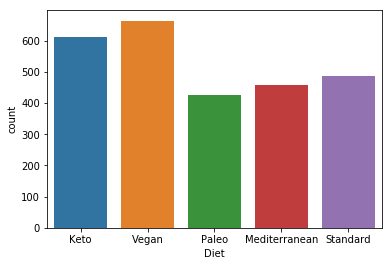

In [307]:
# Plotting distribution of the dataset

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(recipes['Diet'])
plt.show()
